# Flipkart Tweets - Sentiment Analysis

In [111]:
import os
import tweepy as tw
import pandas as pd
import numpy as np

In [2]:
consumer_key="EDOZyCiD1YRvYMCgZf8yOJDCS"
consumer_secret="jGQ2dH04eYUK4pr4luv3Rh2WXvIuXfGzbsgk23Rrzq62yDlXos"
access_token="1019272922081447936-0PFyiAQ6Tu1ykEQL7llMjM75o5A9gz"
access_token_secret="xPFOBZ1uvWQzFuH2kS4sDpEzOa933CORbaLpncXaq0PMI"

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
tweets = tw.Cursor(api.user_timeline,
                           lang="en",id="@Flipkart"
                          ).items(3000)

In [5]:
users_locs = [[tweet.user.screen_name, tweet.user.location,tweet.source,
               tweet.place,tweet.created_at,tweet.user.geo_enabled,
               tweet.user.friends_count,tweet.text,tweet.retweet_count,
               tweet.retweeted] for tweet in tweets]

Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected parameter: lang
Unexpected parameter: id
Unexpected p

In [6]:
tweet_text2 = pd.DataFrame(data=users_locs, 
                    columns=['user', "location","source","place","created_at",
                             "geo_enabled","friends_count",
                             "text","retweet_count","retweeted_status"])
tweet_text2

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,Flipkart,India,Twitter Ads,None,2022-03-25 05:24:08+00:00,False,21,"Mamaearth's waterproof, long-lasting Kohl penc...",2,False
1,Flipkart,India,Twitter Ads,None,2022-03-24 12:15:11+00:00,False,21,With Flipkart economical choices make your kit...,3,False
2,Flipkart,India,Twitter for Android,None,2022-03-24 11:17:45+00:00,False,21,@PlayMPL Our big plan is to help people get th...,0,False
3,Flipkart,India,Twitter Ads,None,2022-03-24 09:21:35+00:00,False,21,@nothing is not just an audio company.\n\nThei...,4,False
4,Flipkart,India,Twitter Web App,None,2022-03-24 08:38:31+00:00,False,21,Nothing will work out if the filters are not a...,5,False
...,...,...,...,...,...,...,...,...,...,...
2995,Flipkart,India,Twitter Ads,None,2019-09-26 07:32:32+00:00,False,21,Here's a #PSA from Deepika! \n\nFlipkart Plus ...,9,False
2996,Flipkart,India,Twitter Web App,None,2019-09-25 11:29:24+00:00,False,21,RT @MadhavSheth1: Are you ready for the 3 incr...,82,False
2997,Flipkart,India,Twitter for Advertisers.,None,2019-09-25 11:07:12+00:00,False,21,"MS Dhoni is back with India's biggest sale, Fl...",32,False
2998,Flipkart,India,Twitter for iPhone,None,2019-09-25 09:29:43+00:00,False,21,Fun isn't something one considers when balanci...,58,False


In [8]:
tweet_text2.to_csv(r"C:\Users\pwn30\Desktop\case\flipkart_tweeet.csv")

In [9]:
import nltk

In [10]:
data2=pd.read_csv(r"C:\Users\pwn30\Desktop\case\flipkart_tweeet.csv")

In [70]:
tweet_text2.shape

(3000, 10)

In [13]:
data2=pd.DataFrame(data2.text)

In [14]:
data2.head()

,text
0,"Mamaearth's waterproof, long-lasting Kohl penc..."
1,With Flipkart economical choices make your kit...
2,@PlayMPL Our big plan is to help people get th...
3,@nothing is not just an audio company.\n\nThei...
4,Nothing will work out if the filters are not a...


In [67]:
data2['text'][0]

'waterproof kohl pencil bodi peach addict bodi mist'

In [15]:
.typedata2.iloc[0,0]

"Mamaearth's waterproof, long-lasting Kohl pencil, Body Cupid's rejuvenating Peach Addict Body Mist, and Just Herb's… https://t.co/uLGc06AJyE"

# Data Cleaning or Pre-Processing

## Lower Case

In [17]:
data2.text=data2.text.str.lower()

In [18]:
data2.iloc[0,0]

"mamaearth's waterproof, long-lasting kohl pencil, body cupid's rejuvenating peach addict body mist, and just herb's… https://t.co/ulgc06ajye"

### Punctuation

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [21]:
data2['text']=data2['text'].apply(lambda x : remove_punctuation(x))

In [22]:
data2.iloc[2,0]

'plaympl our big plan is to help people get the best smartphones that brings out their agame 📱\n\nand youll find a… httpstco2gffkeqnwy'

### Remove URL


In [23]:
data2['text'] = data2['text'].str.replace(r'http\S+|www.\S+','',case=False)
data2.iloc[2,0]

C:\Users\pwn30\AppData\Local\Temp/ipykernel_20276/3879519996.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data2['text'] = data2['text'].str.replace(r'http\S+|www.\S+','',case=False)


'plaympl our big plan is to help people get the best smartphones that brings out their agame 📱\n\nand youll find a… '

### Remove Number

In [25]:
data2['text'] = data2['text'].str.replace('\d+','')

C:\Users\pwn30\AppData\Local\Temp/ipykernel_20276/641326113.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data2['text'] = data2['text'].str.replace('\d+','')


### Removing Stop Words

In [26]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data2['text'] = data2['text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                      if word not in (stop)]))

In [28]:
data2.iloc[1,0]

'flipkart economical choices make kitchen organized arranged find best ecofriendly products…'

### Common Words

In [31]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pwn30\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [29]:
data2.iloc[1,0]

'flipkart economical choices make kitchen organized arranged find best ecofriendly products…'

In [32]:
import re
words = set(nltk.corpus.words.words())
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)
    text =  re.sub("[^a-zA-Z]"," ",text)# Search for all non-letters # Replace all non-letters with spaces
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text) 
                     if w.lower() in words or not w.isalpha())
    text =  re.sub(r' +', ' ',text)
   
    return text
round2 = lambda x: clean_text_round2(x)

In [33]:
# Let's take a look at the updated text
data2 = pd.DataFrame(data2.text.apply(round2))
data2.iloc[1,0]

'economical make kitchen organized find best'

## Stemming

In [34]:
import nltk
#let's import the libraries 
from nltk.stem.snowball import SnowballStemmer

In [36]:
ss = SnowballStemmer("english")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [37]:
def SnowballStemmer_text(text): return [ss.stem(w) for w in w_tokenizer.tokenize(text)]

In [38]:
data2.head()

,text
0,waterproof kohl pencil body peach addict body ...
1,economical make kitchen organized find best
2,big plan help people get best find
3,nothing audio company vision world without peo...
4,nothing work


In [39]:
data2['text'] = data2.text.apply(lambda x :' '.join(SnowballStemmer_text(x))) 
data2.head()

,text
0,waterproof kohl pencil bodi peach addict bodi ...
1,econom make kitchen organ find best
2,big plan help peopl get best find
3,noth audio compani vision world without peopl ...
4,noth work


## Lemmatization

In [40]:
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [41]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [42]:
data2['text'] = data2.text.apply(lambda x :' '.join(lemmatize_text(x)))
data2.head()

,text
0,waterproof kohl pencil bodi peach addict bodi ...
1,econom make kitchen organ find best
2,big plan help peopl get best find
3,noth audio compani vision world without peopl ...
4,noth work


## Strip Extra White Space

In [43]:
data2['text'] = (data2['text'].astype("str").str.rstrip())
data2

,text
0,waterproof kohl pencil bodi peach addict bodi ...
1,econom make kitchen organ find best
2,big plan help peopl get best find
3,noth audio compani vision world without peopl ...
4,noth work
...,...
2995,plus get earli access biggest sale start shop
2996,readi incred come one look pro devic start
2997,dhoni back biggest sale mark
2998,fun someth one balanc univers put smile face


In [45]:
data2['text']

0       waterproof kohl pencil bodi peach addict bodi ...
1                     econom make kitchen organ find best
2                       big plan help peopl get best find
3       noth audio compani vision world without peopl ...
4                                               noth work
                              ...                        
2995        plus get earli access biggest sale start shop
2996           readi incred come one look pro devic start
2997                         dhoni back biggest sale mark
2998         fun someth one balanc univers put smile face
2999                      miss deal crime get smart start
Name: text, Length: 3000, dtype: object

In [51]:
dic = {}
for i in range(len(data2['text'])):
    word = data2['text'][i]
    #spliting the text into words
    stripped = re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numeric or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic   

{'waterproof': 1,
 'kohl': 1,
 'pencil': 4,
 'bodi': 8,
 'peach': 1,
 'addict': 1,
 'mist': 2,
 'econom': 3,
 'make': 157,
 'kitchen': 14,
 'organ': 2,
 'find': 68,
 'best': 156,
 'big': 109,
 'plan': 11,
 'help': 38,
 'peopl': 14,
 'get': 948,
 'noth': 38,
 'audio': 21,
 'compani': 6,
 'vision': 4,
 'world': 31,
 'without': 16,
 'tech': 10,
 'work': 41,
 'life': 42,
 'short': 6,
 'argu': 1,
 'say': 38,
 'promis': 5,
 'last': 41,
 'order': 28,
 'anyway': 2,
 'you': 44,
 'know': 68,
 'phone': 47,
 'offici': 4,
 'come': 87,
 'unlik': 3,
 'anyth': 7,
 'els': 15,
 'not': 2,
 'close': 3,
 'live': 87,
 'watch': 82,
 'troubl': 1,
 'wear': 27,
 'style': 49,
 'pass': 3,
 'check': 80,
 'head': 49,
 'sound': 23,
 'hear': 9,
 'readi': 121,
 'truth': 5,
 'today': 69,
 'click': 18,
 'routin': 12,
 'right': 53,
 'clean': 10,
 'tone': 1,
 'reduc': 5,
 'dark': 3,
 'derma': 1,
 'gel': 1,
 'face': 16,
 'wash': 16,
 'singer': 2,
 'electr': 10,
 'sew': 1,
 'machin': 8,
 'inbuilt': 2,
 'light': 8,
 'plus': 

In [53]:
import operator

In [54]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('get', 948),
 ('special', 518),
 ('offer', 506),
 ('tri', 498),
 ('shop', 234),
 ('day', 183),
 ('new', 175),
 ('make', 157),
 ('best', 156),
 ('sale', 153),
 ('fashion', 139),
 ('readi', 121),
 ('big', 109),
 ('look', 97),
 ('time', 94),
 ('biggest', 91),
 ('latest', 89),
 ('come', 87),
 ('live', 87),
 ('win', 86),
 ('like', 83),
 ('watch', 82),
 ('home', 82),
 ('one', 82),
 ('check', 80),
 ('love', 76),
 ('today', 69),
 ('find', 68),
 ('know', 68),
 ('game', 65),
 ('excit', 63),
 ('play', 62),
 ('beauti', 61),
 ('start', 61),
 ('ring', 58),
 ('everi', 57),
 ('thank', 57),
 ('grab', 56),
 ('take', 55),
 ('right', 53),
 ('billion', 53),
 ('season', 52),
 ('contest', 52),
 ('stay', 51),
 ('power', 50),
 ('style', 49),
 ('head', 49),
 ('want', 48),
 ('need', 48),
 ('experi', 48),
 ('bring', 48),
 ('year', 48),
 ('phone', 47),
 ('avail', 47),
 ('chanc', 47),
 ('wait', 47),
 ('collect', 46),
 ('festiv', 46),
 ('furnitur', 46),
 ('smart', 45),
 ('you', 44),
 ('happi', 44),
 ('tune', 44),


In [55]:
import matplotlib.pyplot as plt

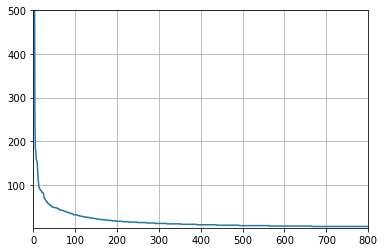

In [57]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,800,1,500])
plt.grid()
plt.show()  

In [58]:
#We decided to take top 200 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(200)]
answer1

['get',
 'special',
 'offer',
 'tri',
 'shop',
 'day',
 'new',
 'make',
 'best',
 'sale',
 'fashion',
 'readi',
 'big',
 'look',
 'time',
 'biggest',
 'latest',
 'come',
 'live',
 'win',
 'like',
 'watch',
 'home',
 'one',
 'check',
 'love',
 'today',
 'find',
 'know',
 'game',
 'excit',
 'play',
 'beauti',
 'start',
 'ring',
 'everi',
 'thank',
 'grab',
 'take',
 'right',
 'billion',
 'season',
 'contest',
 'stay',
 'power',
 'style',
 'head',
 'want',
 'need',
 'experi',
 'bring',
 'year',
 'phone',
 'avail',
 'chanc',
 'wait',
 'collect',
 'festiv',
 'furnitur',
 'smart',
 'you',
 'happi',
 'tune',
 'life',
 'top',
 'first',
 'work',
 'last',
 'give',
 'price',
 'super',
 'great',
 'amaz',
 'join',
 'guess',
 'back',
 'help',
 'noth',
 'say',
 'buy',
 'plus',
 'way',
 'keep',
 'perfect',
 'brand',
 'show',
 'gift',
 'tag',
 'celebr',
 'the',
 'someth',
 'never',
 'stand',
 'enjoy',
 'that',
 'icon',
 'world',
 'next',
 'dont',
 'capit',
 'zone',
 'exclus',
 'fun',
 'launch',
 'don',

In [103]:
final = pd.DataFrame(sorted_dic, columns=['Word', 'Freq'])

In [104]:
final.head()

,Word,Freq
0,get,948
1,special,518
2,offer,506
3,tri,498
4,shop,234


D:\coll_file\Anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\coll_file\Anaconda\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


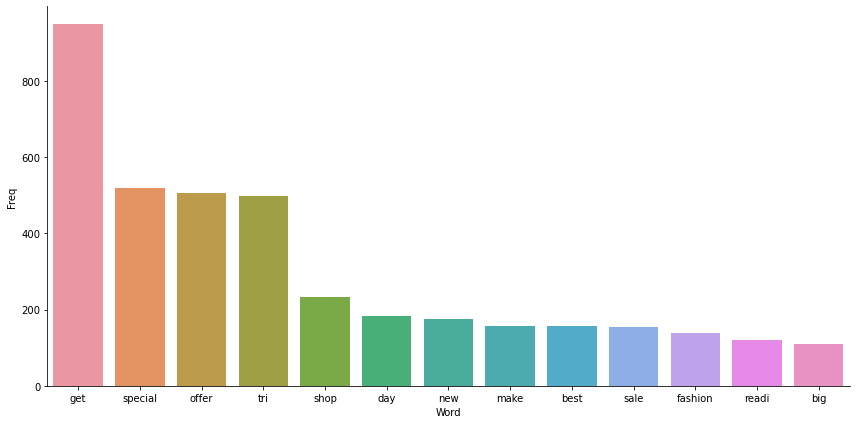

In [106]:
import seaborn as sns
w = final[final['Freq'] >=100] 
fg = sns.factorplot(x='Word', y='Freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

# Word Cloud

In [107]:
text = " ".join(review for review in data2.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 102674 words in the combination of all review.


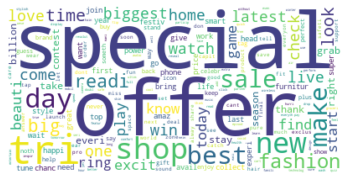

In [108]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",collocations=False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis

In [109]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data2['polarity'] = data2['text'].apply(pol)
data2.head(5)

,text,polarity
0,waterproof kohl pencil bodi peach addict bodi ...,0.0
1,econom make kitchen organ find best,1.0
2,big plan help peopl get best find,0.5
3,noth audio compani vision world without peopl ...,0.0
4,noth work,0.0


In [112]:
data2['Sentiment'] = np.where(data2['polarity']>=0, 'Positive', 'Negative')
data2.head()

,text,polarity,Sentiment
0,waterproof kohl pencil bodi peach addict bodi ...,0.0,Positive
1,econom make kitchen organ find best,1.0,Positive
2,big plan help peopl get best find,0.5,Positive
3,noth audio compani vision world without peopl ...,0.0,Positive
4,noth work,0.0,Positive


In [113]:
data2['Sentiment2'] = np.where(data2['polarity']<0, 'Negative',np.where(data2['polarity']>0, 'Positive','Neutral'))
data2.head()

,text,polarity,Sentiment,Sentiment2
0,waterproof kohl pencil bodi peach addict bodi ...,0.0,Positive,Neutral
1,econom make kitchen organ find best,1.0,Positive,Positive
2,big plan help peopl get best find,0.5,Positive,Positive
3,noth audio compani vision world without peopl ...,0.0,Positive,Neutral
4,noth work,0.0,Positive,Neutral


<AxesSubplot:>

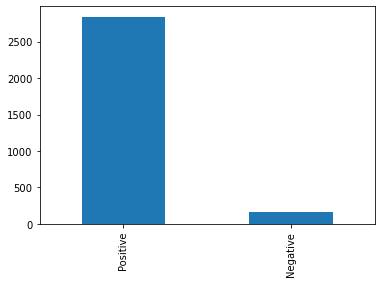

In [114]:
data2.Sentiment.value_counts().plot.bar()

<AxesSubplot:>

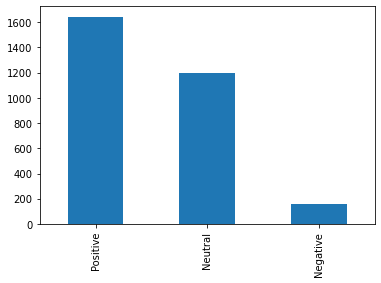

In [115]:
data2.Sentiment2.value_counts().plot.bar()

In [116]:
data2.Sentiment.value_counts()

Positive    2840
Negative     160
Name: Sentiment, dtype: int64